In [1]:
### Librerías a utilizar ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
### Importar datos ###
datos = pd.read_csv('bestsellers with categories.csv')
datos.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# Comprobar la presencia de datos nulos#
is_Null = pd.isnull(datos)
is_Null

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


# <div align="left">1) Explore la tendencia a lo largo del año para cada género: Número de libros más vendidos en cada género cada año: Precio medio, reseñas y valoración de los usuarios a lo largo del año por género
</div>

* Número de libros más vendidos en cada género cada año

In [4]:
# Separamos por categorías para poder graficar#

#Primera Categoría - Género no ficticios#
datos_no_ficticios = datos[datos['Genre'] == 'Non Fiction']
# Eliminamos los datos que no son relevantes para la gráfica#
datos_no_ficticios.drop(['Name','Author','Reviews','Price'],1)

#Segunda Categoría - Género ficticios#
datos_ficticios = datos[datos['Genre'] == 'Fiction']
# Eliminamos los datos que no son relevantes para la gráfica#
datos_ficticios.drop(['Name','Author','Reviews','Price'],1)

,User Rating,Year,Genre
1,4.6,2011,Fiction
3,4.7,2017,Fiction
5,4.4,2011,Fiction
6,4.7,2014,Fiction
7,4.7,2017,Fiction
...,...,...,...
541,4.8,2014,Fiction
542,4.8,2015,Fiction
543,4.8,2016,Fiction
544,4.8,2017,Fiction


In [5]:
# agrupamos por año y normalizamos #

# Primera Categoría #
datos_no_ficticios_por_anio = datos_no_ficticios.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
datos_no_ficticios_mm = mm_scaler.fit_transform(datos_no_ficticios_por_anio)
datos_no_ficticios_mm = pd.DataFrame(datos_no_ficticios_mm, columns=datos_no_ficticios_por_anio.columns)
datos_no_ficticios_mm.index = datos_no_ficticios_por_anio.index

# Segunda Categoría #
datos_ficticios_por_anio = datos_ficticios.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
datos_ficticios_mm = mm_scaler.fit_transform(datos_ficticios_por_anio)
datos_ficticios_mm = pd.DataFrame(datos_ficticios_mm, columns=datos_ficticios_por_anio.columns)
datos_ficticios_mm.index = datos_ficticios_por_anio.index

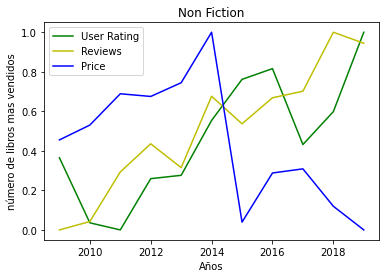

In [6]:
# graficammos la primera categoría#
plt.plot(datos_no_ficticios_mm.index,datos_no_ficticios_mm['User Rating'], color='g', label = 'User Rating')
plt.plot(datos_no_ficticios_mm.index,datos_no_ficticios_mm['Reviews'], color='y',label = 'Reviews')
plt.plot(datos_no_ficticios_mm.index,datos_no_ficticios_mm['Price'], color='b',label = 'Price')
plt.xlabel('Años')
plt.ylabel('número de libros mas vendidos')
plt.title('Non Fiction')
plt.legend()
plt.show()

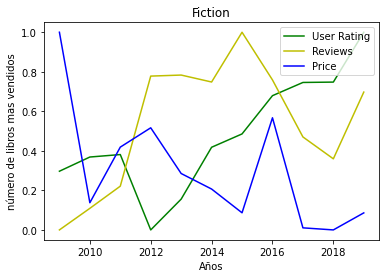

In [7]:
# graficammos la segunda categoría#
plt.plot(datos_ficticios_mm.index,datos_ficticios_mm['User Rating'], color='g', label = 'User Rating')
plt.plot(datos_ficticios_mm.index,datos_ficticios_mm['Reviews'], color='y',label = 'Reviews')
plt.plot(datos_ficticios_mm.index,datos_ficticios_mm['Price'], color='b',label = 'Price')
plt.xlabel('Años')
plt.ylabel('número de libros mas vendidos')
plt.title('Fiction')
plt.legend()
plt.show()

* Precio medio, reseñas y valoración de los usuarios a lo largo del año por género

In [8]:
# por género no ficticio #
datos_no_ficticios_por_anio = datos_no_ficticios.groupby(['Year']).mean()
datos_no_ficticios_por_anio

,User Rating,Reviews,Price
Year,,,
2009,4.576923,3026.230769,15.230769
2010,4.520000,3526.533333,16.000000
2011,4.513793,6482.758621,17.620690
2012,4.558621,8162.931034,17.482759
2013,4.561538,6739.346154,18.192308
2014,4.609524,10994.952381,20.809524
2015,4.645455,9353.484848,10.969697
2016,4.654839,10906.387097,13.516129
2017,4.588462,11297.538462,13.730769


In [9]:
# por género ficticio #
datos_ficticios_por_anio = datos_ficticios.groupby(['Year']).mean()
datos_ficticios_por_anio

,User Rating,Reviews,Price
Year,,,
2009,4.591667,6534.333333,15.583333
2010,4.615000,8409.250000,9.700000
2011,4.619048,10335.285714,11.619048
2012,4.495238,19896.238095,12.285714
2013,4.545833,19986.833333,10.708333
2014,4.631034,19382.862069,10.172414
2015,4.652941,23706.117647,9.352941
2016,4.715789,19563.263158,12.631579
2017,4.737500,14611.833333,8.833333


# 2) Analizar las variables por autor

* Construir una tabla de autores
* Define la función para contar el número de libros que tiene un autor en la lista de los más vendidos:
    * ¿Cuántos libros tienen los autores más vendidos?
    * Lista de autores con al menos 3 libros más vendidos:

# * Construir una tabla de autores

In [10]:
autores = datos['Author']
autores.to_csv('Author.csv')
autores

0                      JJ Smith
1                  Stephen King
2            Jordan B. Peterson
3                 George Orwell
4      National Geographic Kids
                 ...           
545                 Jeff Kinney
546                 Jen Sincero
547                 Jen Sincero
548                 Jen Sincero
549                 Jen Sincero
Name: Author, Length: 550, dtype: object

# * Define la función para contar el número de libros que tiene un autor en la lista de los más vendidos

In [11]:
# función #
def autor_mas_vendidos(lista_mas_vendidos):
    n = lista_mas_vendidos['Author'].value_counts()
    return n

# * ¿Cuántos libros tienen los autores más vendidos?

In [12]:
datos['Best Sellers'] = datos['Reviews']*datos['Price']
datos_best_sellers = datos.drop(['Name','Reviews','Price','User Rating','Genre','Year'],1).sort_values(by='Best Sellers',ascending=False)
datos_best_sellers = datos_best_sellers.drop(datos_best_sellers[datos_best_sellers['Best Sellers']==0].index)
datos_best_sellers

,Author,Best Sellers
382,Paula Hawkins,1430028
338,Paulo Coelho,1396161
534,Delia Owens,1317615
70,American Psychiatric Association,701295
69,American Psychiatric Association,701295
...,...,...
300,Zhi Gang Sha,3740
264,Rick Riordan,1096
11,Larry Schweikart,920
91,David Zinczenko,720


In [13]:
# Usamos la función para conocer el número de libros que tiene un autor en la lista de los más vendidos#
num_libros_x_autor_mas_vendido = autor_mas_vendidos(datos_best_sellers)
num_libros_x_autor_mas_vendido.to_csv('Libros_mas_vendidos.csv')
num_libros_x_autor_mas_vendido

Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Jeff Kinney                            9
                                      ..
Robert Jordan                          1
Steve Harvey                           1
James Comey                            1
Jon Stewart                            1
Adam Mansbach                          1
Name: Author, Length: 245, dtype: int64

# * Lista de autores con al menos 3 libros más vendidos

In [14]:
num_libros_x_autor_mas_vendido = pd.read_csv('Libros_mas_vendidos.csv')
lista_datos = num_libros_x_autor_mas_vendido[num_libros_x_autor_mas_vendido['Author'] >= 3]
lista_datos.shape
lista_datos.head()

,Unnamed: 0,Author
0,Suzanne Collins,11
1,Gary Chapman,11
2,Rick Riordan,11
3,American Psychological Association,10
4,Jeff Kinney,9


# 3) Distribuciones de las variables
Explorar la distribución del Precio

In [15]:
# evaluamos el tipo de dato de las variables #
print(datos.dtypes)
datos['Price'].describe()

Name             object
Author           object
User Rating     float64
Reviews           int64
Price             int64
Year              int64
Genre            object
Best Sellers      int64
dtype: object


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

Text(0, 0.5, 'Conteo')

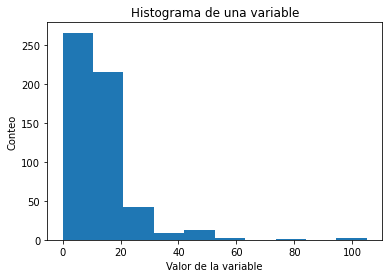

In [16]:
# Graficamos un histograma para observar la distribución de una variable #
datos['Price'].plot.hist()
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


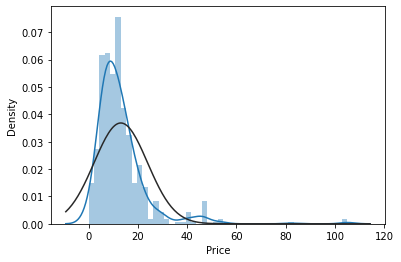

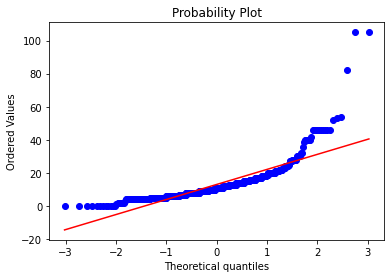

In [17]:
# Histograma y gráfico de probabilidad normal: #
sns.distplot(datos['Price'], fit = norm);
fig = plt.figure()
res = stats.probplot(datos['Price'], plot = plt)

Comentario: Mediante la gráfica se puede concluir que la variable "Price" no sigue una distribución normal ya que tiene valores realmentes altos que a cada rato suben y bajan, estos datos se los puede tratar con normalización, al ser este valor un número entero al momento de transformar a dato se puede adecuar a lo normal por tal motivo se lo transforma a un dato tipo flotante.

In [18]:
datos['Price'] = datos['Price'].astype(np.float64)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

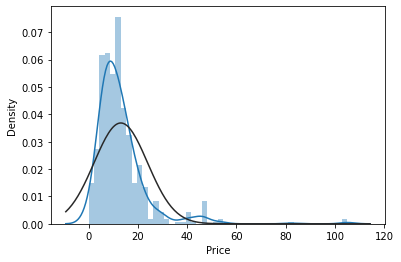

In [19]:
# Se vuelve a graficar #
sns.distplot(datos['Price'], fit = norm)

In [20]:
# A continuación se realiza un test de normalidad para observar la distribución de la variable Price #
columnas_numericas = datos.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(datos[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna User Rating no sigue una distribución normal
Columna Price no sigue una distribución normal


In [21]:
# Transformamos User Rating a normal#
datos['User Rating'] = np.log(datos['User Rating'])

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


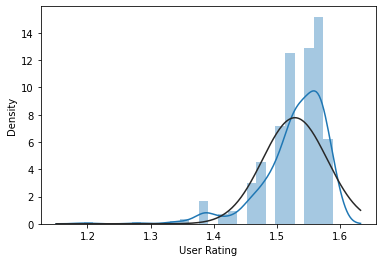

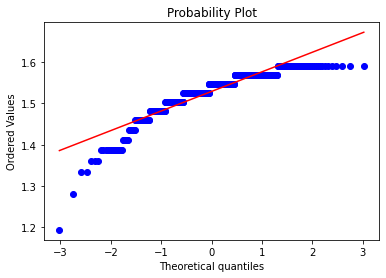

In [22]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados para User Rating:
sns.distplot(datos['User Rating'], fit = norm);
fig = plt.figure()
res = stats.probplot(datos['User Rating'], plot = plt)

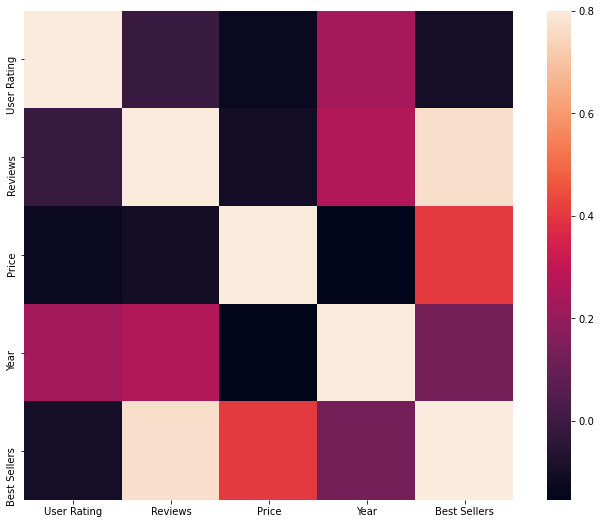

In [23]:
# Matriz de Correlación #
matriz = datos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz, vmax=.8, square=True);

# 4) Explorar las relaciones entre las variables en el conjunto de datos
- Relación entre las Reseñas y la Valoración de los Usuarios, en comparación con el Género:
- Explorar la relación entre el Precio y la Calificación de los Usuarios, comparada entre el Género

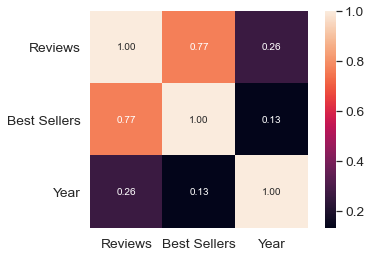

In [24]:
# Matriz de correlación
k = 3 # Número de variables.
cols = matriz.nlargest(k, 'Reviews')['Reviews'].index
cm = np.corrcoef(datos[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

- Relación entre las Reseñas y la Valoración de los Usuarios, en comparación con el Género:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


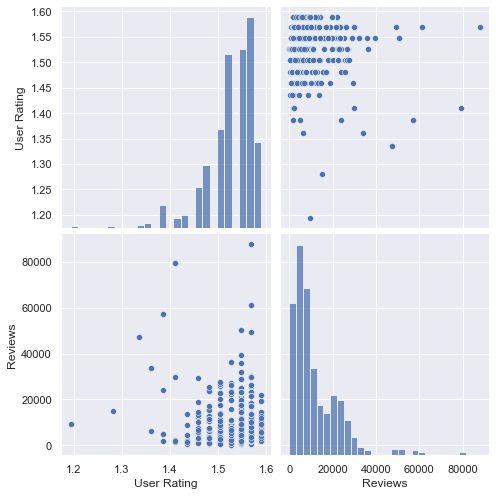

In [25]:
sns.set()
columnas = ['User Rating', 'Reviews', 'Genre']
sns.pairplot(datos[columnas], size = 3.5)
plt.show();

* Explorar la relación entre el Precio y la Calificación de los Usuarios, comparada entre el Género

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


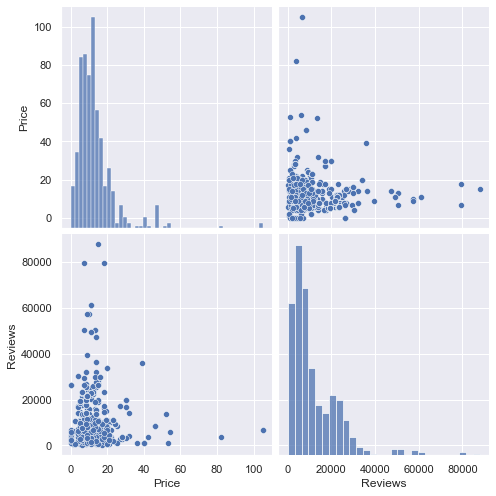

In [26]:
sns.set()
columnas = ['Price', 'Reviews', 'Genre']
sns.pairplot(datos[columnas].round(1), size = 3.5)
plt.show();

# 5) Exploración de las relaciones entre las variables cuando se agrupan por autor
* Explorar la relación entre el total de reseñas que tiene un autor y la valoración media de los usuarios para ese autor.
* Explorar la relación entre el precio medio de los libros más vendidos de un autor y la valoración media de los usuarios de ese autor.

# * Explora la relación entre el total de reseñas que tiene un autor y la calificación promedio de usuario de ese autor

In [27]:
libros_datos = datos
libros_datos = libros_datos.drop(['Name'],axis=1)
libros_datos

,Author,User Rating,Reviews,Price,Year,Genre,Best Sellers
0,JJ Smith,1.547563,17350,8.0,2016,Non Fiction,138800
1,Stephen King,1.526056,2052,22.0,2011,Fiction,45144
2,Jordan B. Peterson,1.547563,18979,15.0,2018,Non Fiction,284685
3,George Orwell,1.547563,21424,6.0,2017,Fiction,128544
4,National Geographic Kids,1.568616,7665,12.0,2019,Non Fiction,91980
...,...,...,...,...,...,...,...
545,Jeff Kinney,1.589235,9413,8.0,2019,Fiction,75304
546,Jen Sincero,1.547563,14331,8.0,2016,Non Fiction,114648
547,Jen Sincero,1.547563,14331,8.0,2017,Non Fiction,114648
548,Jen Sincero,1.547563,14331,8.0,2018,Non Fiction,114648


In [28]:
autores_series_rating = libros_datos.iloc[:][['Author','User Rating']]
autores_series_reviews = libros_datos.iloc[:][['Author','Reviews']]
autores_rating_mean_series = autores_series_rating.groupby(['Author']).mean()
autores_reviws_count_series = autores_series_reviews.groupby(['Author']).sum()
review_counts_vs_rating_mean = pd.merge(autores_rating_mean_series,autores_reviws_count_series, on='Author')
review_counts_vs_rating_mean

,User Rating,Reviews
Author,,
Abraham Verghese,1.526056,9732
Adam Gasiewski,1.481605,3113
Adam Mansbach,1.568616,9568
Adir Levy,1.568616,8170
Admiral William H. McRaven,1.547563,10199
...,...,...
Walter Isaacson,1.518730,18668
William Davis,1.481605,14994
William P. Young,1.526056,39440


In [29]:
# Normalizamos los datos #
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(review_counts_vs_rating_mean)
review_counts_vs_rating_mean_mm = pd.DataFrame(x_mm, columns=['User Rating','Reviews'])
review_counts_vs_rating_mean_mm.index = review_counts_vs_rating_mean.index
review_counts_vs_rating_mean_mm

,User Rating,Reviews
Author,,
Abraham Verghese,0.723214,0.034074
Adam Gasiewski,0.528471,0.010271
Adam Mansbach,0.909667,0.033484
Adir Levy,0.909667,0.028457
Admiral William H. McRaven,0.817432,0.035753
...,...,...
Walter Isaacson,0.691117,0.066209
William Davis,0.528471,0.052997
William P. Young,0.723214,0.140910


C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


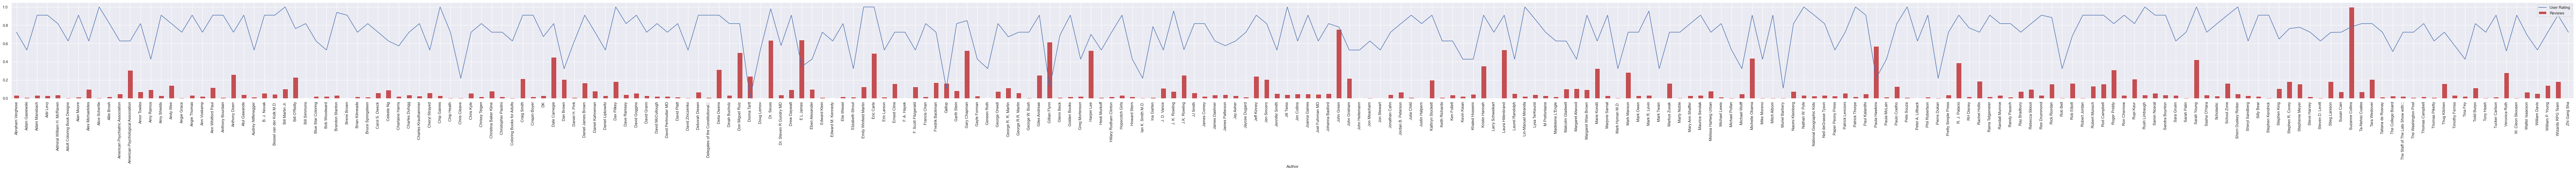

In [30]:
# Graficamos #
plt.rcParams["figure.figsize"] = [130,5]
fig = plt.figure()
review_counts_vs_rating_mean_mm['User Rating'].plot(kind = 'line')
review_counts_vs_rating_mean_mm['Reviews'].plot(kind = 'bar', color='r')
plt.legend()

# * Explorar la relación entre el precio medio de los libros más vendidos de un autor y la valoración media de los usuarios de ese autor.

In [31]:
# Calcular el precio medio de los libros más vendidos de un autor #
autores_series_price = libros_datos.iloc[:][['Author','Price']]
autores_series_price = autores_series_price.sort_values(by=['Price'], ascending=False, ignore_index=True)
autores_series_price = autores_series_price.iloc[:11]
autores_price_mean_series = autores_series_price.groupby(['Author']).mean()
autores_price_mean_series

,Price
Author,
American Psychiatric Association,105.0
American Psychological Association,46.0
Bill Simmons,53.0
J. K. Rowling,52.0
Lin-Manuel Miranda,54.0
Stephenie Meyer,82.0


In [32]:
autores_series_rating = libros_datos.iloc[:][['Author','User Rating']]
autores_series_rating_series = autores_series_rating.groupby(['Author']).mean()
autores_series_rating_series = pd.merge(autores_series_rating_series,autores_price_mean_series, on ='Author')
autores_series_rating_series

,User Rating,Price
Author,,
American Psychiatric Association,1.504077,105.0
American Psychological Association,1.504077,46.0
Bill Simmons,1.547563,53.0
J. K. Rowling,1.578926,52.0
Lin-Manuel Miranda,1.589235,54.0
Stephenie Meyer,1.538346,82.0


In [33]:
# Normalizamos los datos #
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(autores_series_rating_series)
analisis = pd.DataFrame(x_mm, columns=['User Rating','Price'])

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Stephenie Meyer'),
  Text(0.0, 0, 'American Psychiatric Association'),
  Text(1.0, 0, 'American Psychological Association'),
  Text(2.0, 0, 'Bill Simmons'),
  Text(3.0, 0, 'J. K. Rowling'),
  Text(4.0, 0, 'Lin-Manuel Miranda'),
  Text(5.0, 0, 'Stephenie Meyer'),
  Text(6.0, 0, '')])

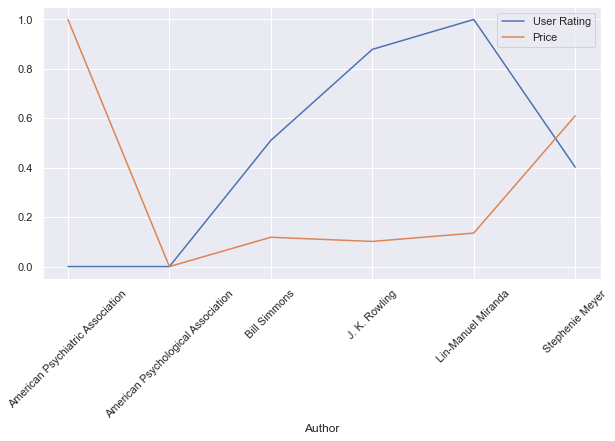

In [34]:
# Graficamos #
analisis.index =  autores_series_rating_series.index
analisis.plot(figsize= [10,5])
plt.xticks(rotation=45)

# Predicción de datos

In [35]:
# Creamos variables de entrenamiento #
dummys_year = pd.get_dummies(libros_datos['Year'])
dummys_gen = pd.get_dummies(libros_datos['Genre'])
tabla_sin_algunos_datos = libros_datos.drop(['Author','Year','Genre','Best Sellers'],1)
x = pd.concat([tabla_sin_algunos_datos,dummys_year,dummys_gen], axis=1)

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(libros_datos['Author'])
x

,User Rating,Reviews,Price,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Fiction,Non Fiction
0,1.547563,17350,8.0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1.526056,2052,22.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1.547563,18979,15.0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.547563,21424,6.0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.568616,7665,12.0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.589235,9413,8.0,0,0,0,0,0,0,0,0,0,0,1,1,0
546,1.547563,14331,8.0,0,0,0,0,0,0,0,1,0,0,0,0,1
547,1.547563,14331,8.0,0,0,0,0,0,0,0,0,1,0,0,0,1
548,1.547563,14331,8.0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [36]:
# Normalizamos los datos #
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
x = pd.DataFrame(x_mm, columns=x.columns)

In [37]:
# identificamos los datos de entrenamiento y de prueba #
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0, train_size= 0.75)

In [38]:
# Entrenamos el modelo #
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [39]:
# Calculamos el score #
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.4275


In [40]:
# Predecimos #
prediccions = tree_one.predict(x_test)

In [41]:
#Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

# Predicción a que genero pertenece

In [42]:
x2 = libros_datos[['Reviews','Price','Year','Best Sellers']]
autors = pd.DataFrame(label_encoder.fit_transform(libros_datos['Author']), columns=['author'])
x2 = pd.concat([x2,autors], axis=1)
y2 = libros_datos

y2= libros_datos["Genre"].astype('category')
y2 = y2.cat.codes

In [43]:
# Normalizamos los datos #
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x2)
x2 = pd.DataFrame(x_mm, columns=x2.columns)
x2

,Reviews,Price,Year,Best Sellers,author
0,0.197178,0.076190,0.7,0.097061,0.461538
1,0.022949,0.209524,0.2,0.031569,0.886640
2,0.215730,0.142857,0.9,0.199077,0.542510
3,0.243577,0.057143,0.8,0.089889,0.384615
4,0.086875,0.114286,1.0,0.064320,0.704453
...,...,...,...,...,...
545,0.106783,0.076190,1.0,0.052659,0.485830
546,0.162794,0.076190,0.7,0.080172,0.489879
547,0.162794,0.076190,0.8,0.080172,0.489879
548,0.162794,0.076190,0.9,0.080172,0.489879


In [44]:
# identificamos los datos de entrenamiento y de prueba #
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.05, random_state = 0, train_size= 0.95)

In [45]:
# Random Forest #
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

In [46]:
# calculamos el score #
tree_one_accuracy = round(randForest.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.8929


In [47]:
predictions = tree_one.predict(x_test)
predictions = pd.DataFrame(predictions, columns=['predict'])
print(predictions.value_counts())
print(y_test.value_counts())

predict
1          18
0          10
dtype: int64
1    17
0    11
dtype: int64
